In [1]:
import numpy as np
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from scipy.special import boxcox1p

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

pd.options.display.max_columns = 300
pd.options.display.max_colwidth = 30
pd.options.display.max_rows = 100

In [2]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=Y:/USERDATA/Harshad/Data/ML/Clustering_Idea1/UFG_Dec2017_Catography.mdb;')
cursor = conn.cursor()
cursor.execute('select top 100000 * from dbo_CATography_Master')

In [3]:
columns = ['UniversalID','MODELUSED','PORTFOLIODATE','ACCOUNT','AGENTCODE','AGENTNAME','SOURCECO','DIVISION','POLICY','POLICYFORM','PROGRAMNAME','LOB','INCEPTDATE','EXPIREDATE','ADDRESS1','ADDRESS2',
'ADMIN1','ADMIN1DESC','ADMIN2','ADMIN2DESC','ADMIN3','ADMIN3DESC','ADMIN4','ADMIN4DESC','ADMIN5','ADMIN5DESC','ADMIN6','ADMIN6DESC','ADDRMATCH','ADDRMATCHCODE','GEORESOLUTIONCODE','GEODATASOURCEID',
'LATITUDE','LONGITUDE','DTC','RMSLOCNUM','LOCNUM','BLDGNUM','NUMBLDGS','NUMSTORIES','AREA','YEARBUILT','HUIND','HUCONSTSCHEME','HUCONSTCODE','HUCONSTDESC','EQIND','EQCONSTSCHEME','EQCONSTCODE','EQCONSTDESC',
'HAILIND','FFIND','TOIND','FLOODIND','AUTOIND','CLIENTCONSTRUCTION','CLIENTOCCUPANCY','OCCUPANCYSCHEME','OCCUPANCYCODE','OCCUPANCYDESC','ROOFGEOM','ROOFAGE','ROOFSYSTEM','CLADRATE','ROOFANCHOR',
'RESISTOPEN','DEDHU','DEDHUPER','DEDEQ','DEDEQPER','DEDHAIL','DEDHAILPER','DEDTO','DEDTOPER','DED','AUTOLIM','BUILDLIM','OSTRUCLIM','CONTLIM','TELIM','TOTLIM','TIV','AUTOVAL','BUILDVAL','OSTRUCVAL',
'CONTVAL','TEVAL','PREMIUM','POLICYLIMIT','GROUNDUPLOSS','GROSSLOSS','PRECATLOSS','MODELEDLOSSRATIO','DAMAGERATIO','CONTRTIL','CONTRAAL','PROTCLASS','LIQUEFACTION','LANDSLIDE','SOILTYPE','TERRITORY',
'ELEVATION','FLOODZONE','RMSHU_GU','RMSHU_GR','RMSHU_LR','RMSHU_DR','RMSEQ_GU','RMSEQ_GR','RMSEQ_LR','RMSEQ_DR','RMSTO_GU','RMSTO_GR','RMSTO_LR','RMSTO_DR','RMSFF_GU','RMSFF_GR','RMSFF_LR','RMSFF_DR',
'RMSWS_GU','RMSWS_GR','RMSWS_LR','RMSWS_DR','RMSFL_GU','RMSFL_GR','RMSFL_LR','RMSFL_DR','RMSTER_GU','RMSTER_GR','RMSTER_LR','RMSTER_DR','RMSGROUNDUPLOSS','RMSGROSSLOSS','RMSPRECATLOSS','RMSLOSSRATIO',
'RMSDAMAGERATIO','RMSCONTRTIL','RMSCONTRAAL','SUNTER_GU','SUNTER_GR','SUNTER_LR','SUNTER_DR','AIRHU_GU','AIRHU_GR','AIRHU_LR','AIRHU_DR','AIREQ_GU','AIREQ_GR','AIREQ_LR','AIREQ_DR','AIRTO_GU',
'AIRTO_GR','AIRTO_LR','AIRTO_DR','AIRFF_GU','AIRFF_GR','AIRFF_LR','AIRFF_DR','AIRWS_GU','AIRWS_GR','AIRWS_LR','AIRWS_DR','AIRFL_GU','AIRFL_GR','AIRFL_LR','AIRFL_DR','AIRGROUNDUPLOSS','AIRGROSSLOSS','AIRPRECATLOSS',
'AIRLOSSRATIO','AIRDAMAGERATIO','AIRCONTRTIL','AIRCONTRAAL','BlendHU_GU','BlendHU_GR','BlendHU_LR','BlendHU_DR','BlendEQ_GU','BlendEQ_GR','BlendEQ_LR','BlendEQ_DR','BlendTO_GU','BlendTO_GR','BlendTO_LR','BlendTO_DR',
'BlendFF_GU','BlendFF_GR','BlendFF_LR','BlendFF_DR','BlendWS_GU','BlendWS_GR','BlendWS_LR','BlendWS_DR','BlendFL_GU','BlendFL_GR','BlendFL_DR','BlendGROUNDUPLOSS','BlendGROSSLOSS','BlendPRECATLOSS',
'BlendLOSSRATIO','BlendDAMAGERATIO','BlendCONTRTIL','BlendCONTRAAL','PROF_PROJ_PREM','PROF_FHCF_COST','PROF_REIN_COST','PROF_AAL','PROF_CEDED_FHLF_AAL','PROF_CEDED_AAL','PROF_EXPENSE','PROF_ATTR_LOSS',
'PROF_UW_PROFIT','PROF_PROFIT_%_PREM','TEMP1','TEMP2','TEMP3','TEMP4','TEMP5','TEMP6','TEMP7','TEMP8','TEMP9','TEMP10','TEMP11','TEMP12','TEMP13','TEMP14','TEMP15','TEMP16','TEMP17','TEMP18',
'TEMP19','TEMP20','TEMP21','TEMP22','TEMP23','TEMP24','TEMP25','TEMP26','TEMP27','TEMP28','TEMP29','TEMP30']

In [4]:
d1 = []
for row in cursor.fetchall():
    d1.append(list(row))

In [5]:
df = pd.DataFrame(d1, columns=columns)

In [6]:
# 19 columns included - DTC, ROOFSYSTEM,
drop_columns = ['UniversalID','MODELUSED','PORTFOLIODATE','ACCOUNT','AGENTCODE','AGENTNAME','SOURCECO','DIVISION','POLICY','POLICYFORM','PROGRAMNAME','LOB','INCEPTDATE','EXPIREDATE','ADDRESS1','ADDRESS2',
'ADMIN1','ADMIN1DESC','ADMIN2','ADMIN2DESC','ADMIN3','ADMIN3DESC','ADMIN4','ADMIN4DESC','ADMIN5','ADMIN5DESC','ADMIN6','ADMIN6DESC','ADDRMATCH','ADDRMATCHCODE','GEORESOLUTIONCODE','GEODATASOURCEID',
'LATITUDE','LONGITUDE','RMSLOCNUM','LOCNUM','BLDGNUM','NUMBLDGS','NUMSTORIES','AREA','YEARBUILT','HUIND','HUCONSTSCHEME','HUCONSTCODE','HUCONSTDESC','EQIND','EQCONSTSCHEME','EQCONSTCODE','EQCONSTDESC',
'HAILIND','FFIND','TOIND','FLOODIND','AUTOIND','CLIENTCONSTRUCTION','CLIENTOCCUPANCY','OCCUPANCYSCHEME','OCCUPANCYCODE','OCCUPANCYDESC','ROOFGEOM','ROOFAGE','CLADRATE','ROOFANCHOR',
'RESISTOPEN','DEDHU','DEDHUPER','DEDEQ','DEDEQPER','DEDHAIL','DEDHAILPER','DEDTO','DEDTOPER','POLICYLIMIT','MODELEDLOSSRATIO','DAMAGERATIO','CONTRTIL','CONTRAAL','PROTCLASS','LIQUEFACTION','LANDSLIDE','SOILTYPE','TERRITORY',
'ELEVATION','FLOODZONE','RMSHU_GU','RMSHU_GR','RMSHU_LR','RMSHU_DR','RMSEQ_GU','RMSEQ_GR','RMSEQ_LR','RMSEQ_DR','RMSTO_GU','RMSTO_GR','RMSTO_LR','RMSTO_DR','RMSFF_GU','RMSFF_GR','RMSFF_LR','RMSFF_DR',
'RMSWS_GU','RMSWS_GR','RMSWS_LR','RMSWS_DR','RMSFL_GU','RMSFL_GR','RMSFL_LR','RMSFL_DR','RMSTER_GU','RMSTER_GR','RMSTER_LR','RMSTER_DR','RMSGROUNDUPLOSS','RMSGROSSLOSS','RMSPRECATLOSS','RMSLOSSRATIO',
'RMSDAMAGERATIO','RMSCONTRTIL','RMSCONTRAAL','SUNTER_GU','SUNTER_GR','SUNTER_LR','SUNTER_DR','AIRHU_GU','AIRHU_GR','AIRHU_LR','AIRHU_DR','AIREQ_GU','AIREQ_GR','AIREQ_LR','AIREQ_DR','AIRTO_GU',
'AIRTO_GR','AIRTO_LR','AIRTO_DR','AIRFF_GU','AIRFF_GR','AIRFF_LR','AIRFF_DR','AIRWS_GU','AIRWS_GR','AIRWS_LR','AIRWS_DR','AIRFL_GU','AIRFL_GR','AIRFL_LR','AIRFL_DR','AIRGROUNDUPLOSS','AIRGROSSLOSS','AIRPRECATLOSS',
'AIRLOSSRATIO','AIRDAMAGERATIO','AIRCONTRTIL','AIRCONTRAAL','BlendHU_GU','BlendHU_GR','BlendHU_LR','BlendHU_DR','BlendEQ_GU','BlendEQ_GR','BlendEQ_LR','BlendEQ_DR','BlendTO_GU','BlendTO_GR','BlendTO_LR','BlendTO_DR',
'BlendFF_GU','BlendFF_GR','BlendFF_LR','BlendFF_DR','BlendWS_GU','BlendWS_GR','BlendWS_LR','BlendWS_DR','BlendFL_GU','BlendFL_GR','BlendFL_DR','BlendGROUNDUPLOSS','BlendGROSSLOSS','BlendPRECATLOSS',
'BlendLOSSRATIO','BlendDAMAGERATIO','BlendCONTRTIL','BlendCONTRAAL','PROF_PROJ_PREM','PROF_FHCF_COST','PROF_REIN_COST','PROF_AAL','PROF_CEDED_FHLF_AAL','PROF_CEDED_AAL','PROF_EXPENSE','PROF_ATTR_LOSS',
'PROF_UW_PROFIT','PROF_PROFIT_%_PREM','TEMP1','TEMP2','TEMP3','TEMP4','TEMP5','TEMP6','TEMP7','TEMP8','TEMP9','TEMP10','TEMP11','TEMP12','TEMP13','TEMP14','TEMP15','TEMP16','TEMP17','TEMP18',
'TEMP19','TEMP20','TEMP21','TEMP22','TEMP23','TEMP24','TEMP25','TEMP26','TEMP27','TEMP28','TEMP29','TEMP30']

In [7]:
df.drop(drop_columns, axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
DTC             100000 non-null float64
ROOFSYSTEM      100000 non-null int64
DED             100000 non-null float64
AUTOLIM         100000 non-null float64
BUILDLIM        100000 non-null float64
OSTRUCLIM       100000 non-null float64
CONTLIM         100000 non-null float64
TELIM           100000 non-null float64
TOTLIM          100000 non-null float64
TIV             100000 non-null float64
AUTOVAL         100000 non-null float64
BUILDVAL        100000 non-null float64
OSTRUCVAL       100000 non-null float64
CONTVAL         100000 non-null float64
TEVAL           100000 non-null float64
PREMIUM         100000 non-null float64
GROUNDUPLOSS    100000 non-null float64
GROSSLOSS       100000 non-null float64
PRECATLOSS      100000 non-null float64
dtypes: float64(18), int64(1)
memory usage: 14.5 MB


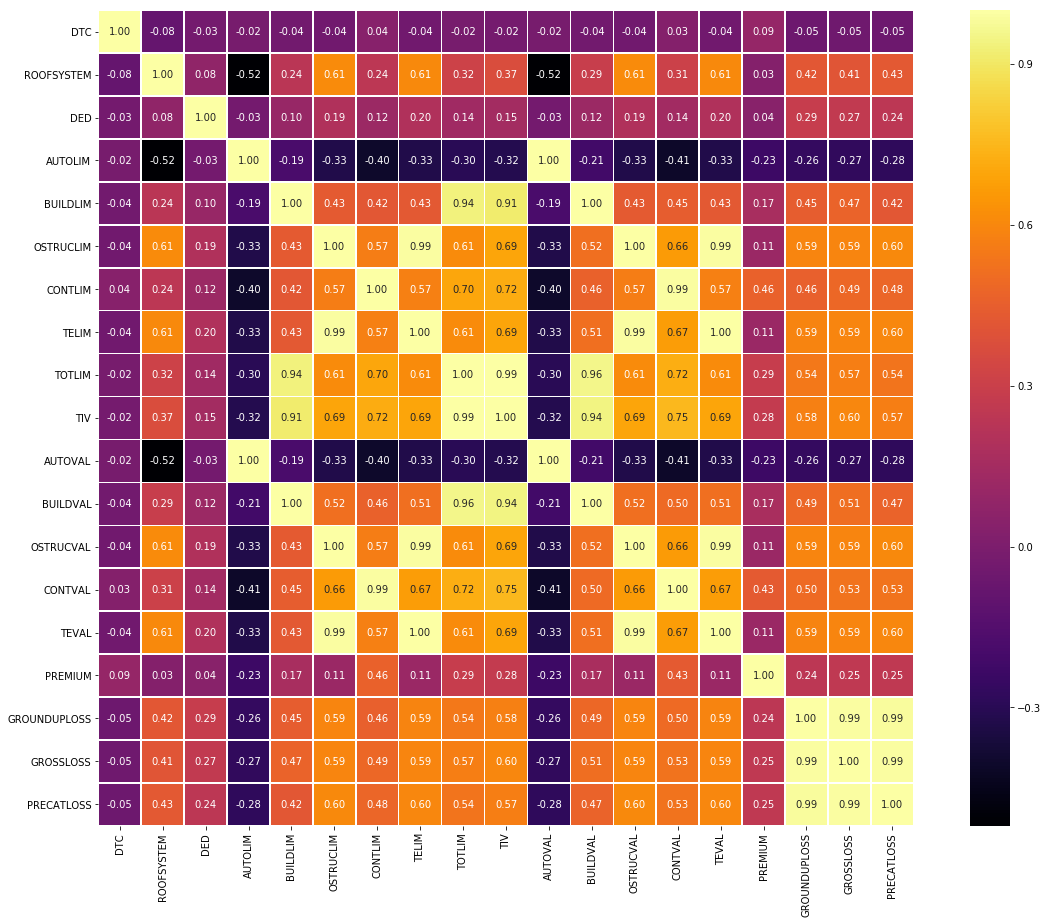

In [86]:
data_corr = df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(data_corr, annot=True, fmt='.2f', square=True, linewidths=.5, cmap='inferno')

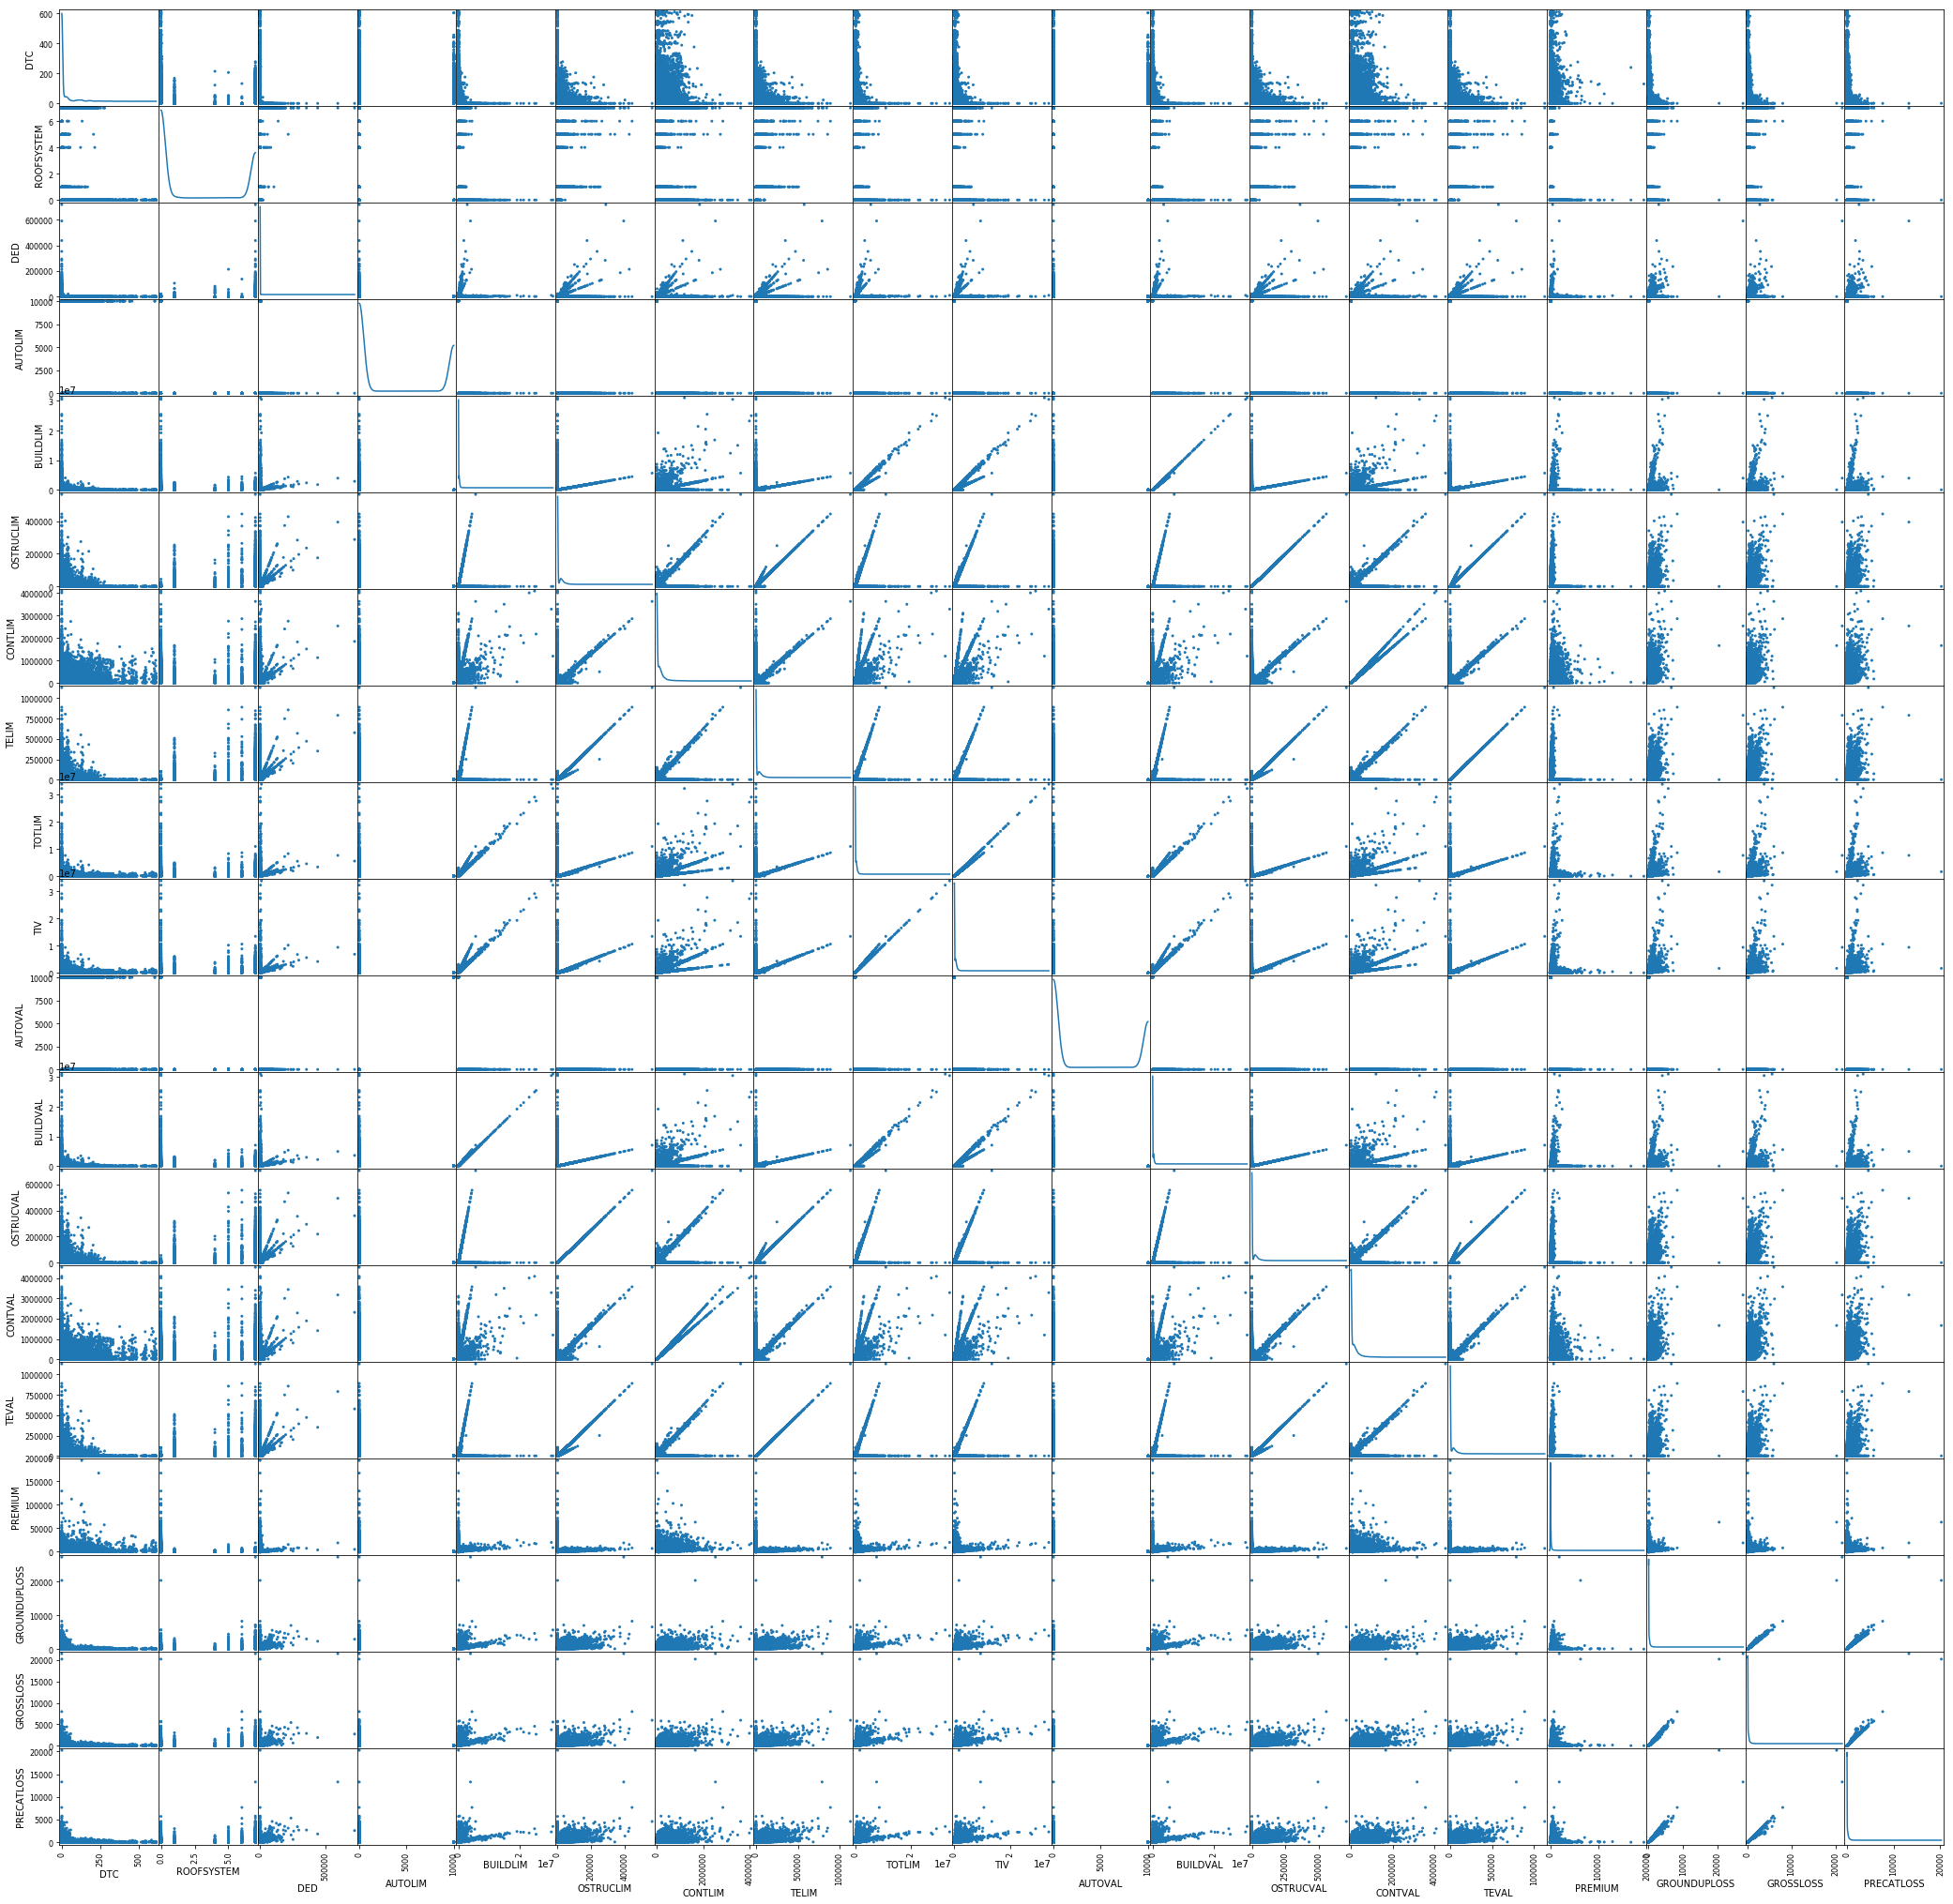

In [88]:
# Produce a scatter matrix for each pair of features in the data
ax = scatter_matrix(df, alpha=1, figsize=(36, 36), diagonal='kde')
# X labels
_ = [plt.setp(item.xaxis.get_label(), 'size', 10) for item in ax.ravel()]
# Y labels
_ = [plt.setp(item.yaxis.get_label(), 'size', 10) for item in ax.ravel()]

In [89]:
# Scale the data using the natural logarithm
log_data = np.log(df)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [94]:
# Normalize data
norm = Normalizer().fit(df)
normalized = norm.transform(df)

In [8]:
df.keys()

Index([u'DTC', u'ROOFSYSTEM', u'DED', u'AUTOLIM', u'BUILDLIM', u'OSTRUCLIM',
       u'CONTLIM', u'TELIM', u'TOTLIM', u'TIV', u'AUTOVAL', u'BUILDVAL',
       u'OSTRUCVAL', u'CONTVAL', u'TEVAL', u'PREMIUM', u'GROUNDUPLOSS',
       u'GROSSLOSS', u'PRECATLOSS'],
      dtype='object')

In [8]:
df[df['PREMIUM'] < 0]

,DTC,ROOFSYSTEM,DED,AUTOLIM,BUILDLIM,OSTRUCLIM,CONTLIM,TELIM,TOTLIM,TIV,AUTOVAL,BUILDVAL,OSTRUCVAL,CONTVAL,TEVAL,PREMIUM,GROUNDUPLOSS,GROSSLOSS,PRECATLOSS
20902,0.0,0,0.0,0.0,0.0,0.0,79000.0,0.0,79000.0,79000.0,0.0,0.0,0.0,79000.0,0.0,-1760.0,26.7,26.7,26.7


In [9]:
df.drop(df.index[[20902]], inplace=True)
box_transform = boxcox1p(df, 0.25)

In [10]:
box_transform.head(5)

,DTC,ROOFSYSTEM,DED,AUTOLIM,BUILDLIM,OSTRUCLIM,CONTLIM,TELIM,TOTLIM,TIV,AUTOVAL,BUILDVAL,OSTRUCVAL,CONTVAL,TEVAL,PREMIUM,GROUNDUPLOSS,GROSSLOSS,PRECATLOSS
0,0.0,0.0,14.924283,0.0,110.003842,0.0,0.000000,0.0,110.003842,110.003842,0.0,110.003842,0.0,0.000000,0.0,28.357254,9.806826,9.537913,9.579764
1,0.0,0.0,36.001000,0.0,193.231826,0.0,87.372251,0.0,195.464864,195.464864,0.0,193.231826,0.0,87.372251,0.0,30.919179,20.180409,19.615099,17.939086
2,0.0,0.0,29.637538,0.0,91.854996,0.0,39.378386,0.0,92.844548,92.844548,0.0,91.854996,0.0,39.378386,0.0,15.335622,7.288878,6.229872,6.253107
3,0.0,0.0,0.000000,0.0,0.000000,0.0,52.919176,0.0,52.919176,52.919176,0.0,0.000000,0.0,52.919176,0.0,14.895889,0.665014,0.665014,0.665014
4,0.0,0.0,0.000000,0.0,0.000000,0.0,22.752955,0.0,22.752955,22.752955,0.0,0.000000,0.0,22.752955,0.0,9.401476,0.105733,0.105733,0.105733


In [11]:
pca = PCA(n_components=6).fit(box_transform)

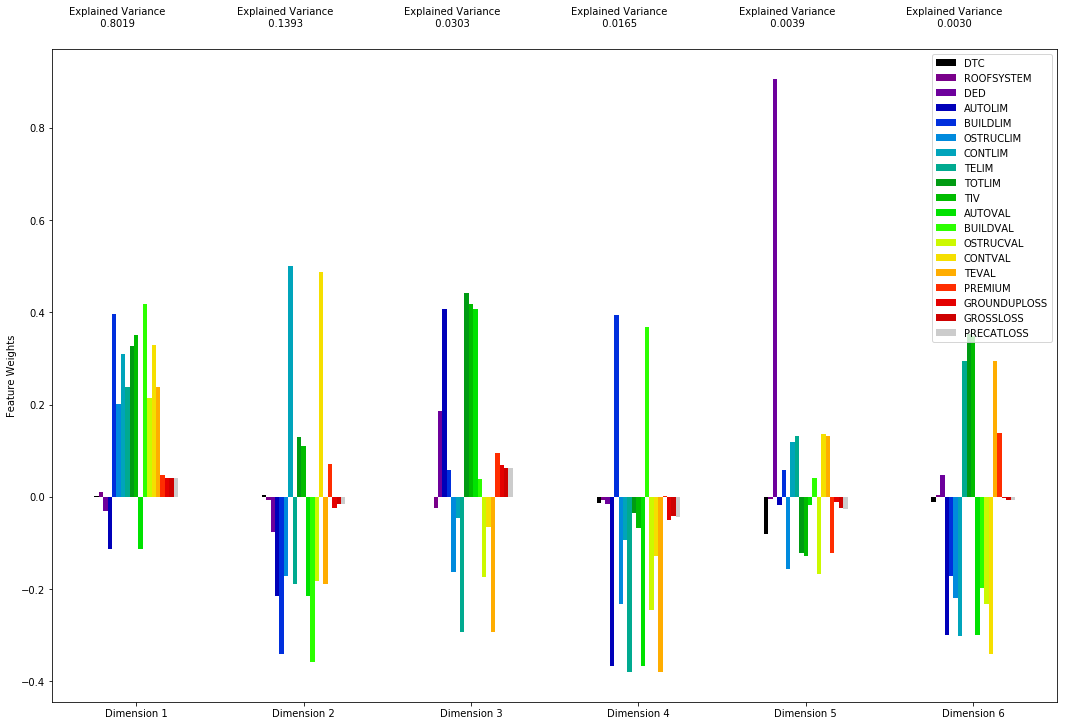

In [12]:
pca_results = vs.pca_results(box_transform, pca, 19)

In [125]:
pca_results

,Explained Variance,DTC,ROOFSYSTEM,DED,AUTOLIM,BUILDLIM,OSTRUCLIM,CONTLIM,TELIM,TOTLIM,TIV,AUTOVAL,BUILDVAL,OSTRUCVAL,CONTVAL,TEVAL,PREMIUM,GROUNDUPLOSS,GROSSLOSS,PRECATLOSS
Dimension 1,0.8019,0.0025,0.0100,-0.0304,-0.1126,0.3957,0.2021,0.3102,0.2392,0.3262,0.3499,-0.1126,0.4180,0.2146,0.3296,0.2392,0.0480,0.0408,0.0408,0.0408
Dimension 2,0.1393,0.0035,-0.0072,-0.0766,-0.2143,-0.3399,-0.1725,0.5006,-0.1883,0.1299,0.1108,-0.2143,-0.3590,-0.1832,0.4877,-0.1883,0.0705,-0.0235,-0.0159,-0.0158
Dimension 3,0.0303,-0.0001,-0.0240,0.1864,0.4075,0.0581,-0.1627,-0.0449,-0.2927,0.4427,0.4192,0.4075,0.0396,-0.1731,-0.0653,-0.2927,0.0946,0.0695,0.0636,0.0625
Dimension 4,0.0165,-0.0127,-0.0066,-0.0162,-0.3658,0.3944,-0.2315,-0.0943,-0.3800,-0.0346,-0.0669,-0.3658,0.3693,-0.2456,-0.1292,-0.3800,0.0028,-0.0504,-0.0412,-0.0428
Dimension 5,0.0039,-0.0807,-0.0054,0.9057,-0.0171,0.0578,-0.1574,0.1182,0.1321,-0.1208,-0.1287,-0.0171,0.0402,-0.1673,0.1365,0.1321,-0.1218,-0.0111,-0.0249,-0.0258
Dimension 6,0.0030,-0.0120,0.0045,0.0464,-0.2999,-0.1722,-0.2185,-0.3027,0.2948,0.3539,0.3483,-0.2999,-0.1966,-0.2322,-0.3409,0.2948,0.1392,-0.0029,-0.0070,-0.0070


### Implementation: Dimensionality Reduction

In [13]:
# Apply Principal Component Analysis (PCA) on transformed data and select only 2 principal components
pca_2d = PCA(n_components=2).fit(box_transform)
# Apply PCA transform on the transformed data fit
reduced_data = pca_2d.transform(box_transform)
# Create dataframe for the transformed data
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

In [14]:
reduced_data.head(5)

,Dimension 1,Dimension 2
0,60.757555,-71.930612
1,242.813125,-25.146179
2,58.135364,-26.339138
3,-34.779256,44.199083
4,-74.807128,6.769403


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

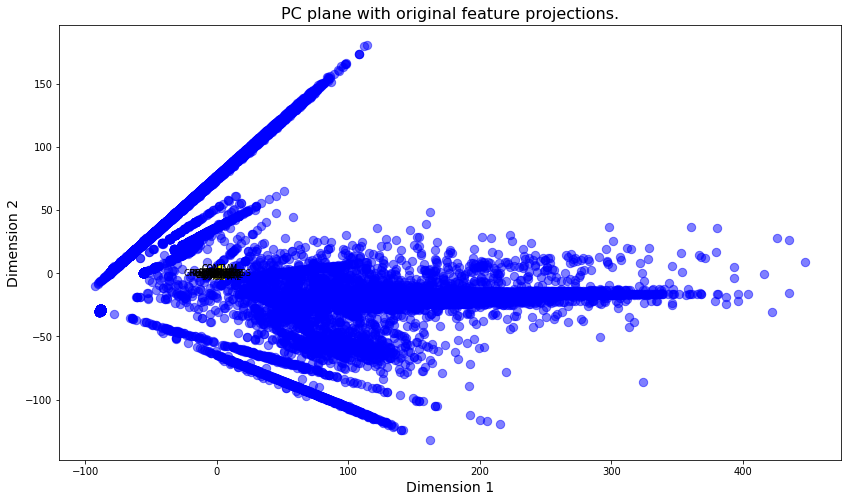

In [15]:
_ = vs.biplot(box_transform, reduced_data, pca_2d)

In [16]:
# Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

score_table = {}
for num_clusters in range(2,16):
    clusterer = GaussianMixture(n_components=num_clusters).fit(reduced_data)
    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # Find the cluster centers
    centers = clusterer.means_
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    score_table[num_clusters] = score
    print "Number of clusters: {}, Silhouette coefficient: {}".format(num_clusters, score)

MemoryError: 

In [18]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 2 columns):
Dimension 1    99999 non-null float64
Dimension 2    99999 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [20]:
type(reduced_data)

pandas.core.frame.DataFrame

In [21]:
# save pandas dataframe to csv files
box_transform.to_csv('box_transformed.csv', sep='\t', encoding='utf-8')
reduced_data.to_csv('reduced_data.csv', sep='\t', encoding='utf-8')